<a href="https://colab.research.google.com/github/rida-manzoor/ML/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Discriminant Analysis (LDA)** is a supervised dimensionality reduction technique that finds the linear combinations of features that best separate different classes in a dataset. It aims to maximize the distance between the means of different classes while minimizing the spread within each class.

## Steps in LDA

1. **Compute Class Means:**
   - Calculate the mean vector for each class in the dataset. This involves finding the mean values for each feature for each class.

2. **Compute Scatter Matrices:**
   - Compute the scatter matrix within classes (scatter within-class) and the scatter matrix between classes (scatter between-class).
     - Within-class scatter matrix \( S_W \): This matrix measures the spread of data within each class.
     - Between-class scatter matrix \( S_B \): This matrix measures the spread between different classes.

3. **Compute Eigenvectors and Eigenvalues:**
   - Solve the generalized eigenvalue problem to find the eigenvectors and eigenvalues of the matrix \( S_W^{-1} S_B \).
   - The eigenvectors represent the directions of maximum variance between classes, and the corresponding eigenvalues indicate the importance of these directions.

4. **Sort Eigenvectors:**
   - Sort the eigenvectors in descending order based on their corresponding eigenvalues. This ensures that the most discriminative directions come first.

5. **Choose the Top k Eigenvectors:**
   - Select the top k eigenvectors corresponding to the k largest eigenvalues to form a transformation matrix \( W \). This matrix will be used to project the data onto a new subspace.

6. **Project Data onto New Subspace:**
   - Use the transformation matrix \( W \) to project the original data onto the new subspace.

LDA aims to maximize the separation between classes in the projected subspace, making it particularly useful for dimensionality reduction in a supervised learning context.


## Pros
1. Maximize Class speration
2. Dimentionality reduction

## Cons
1. Sensitive to outlier
2. Assumption of normality
3. Requires sufficient samples

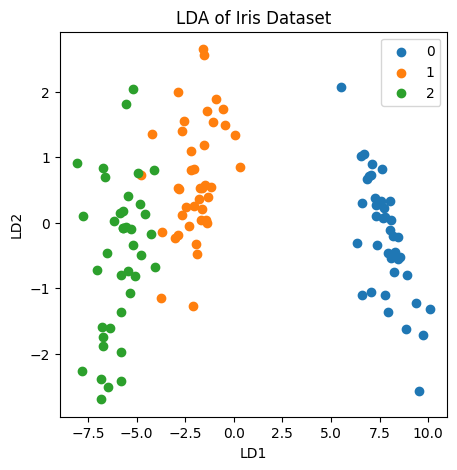

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset (or use your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create an LDA model and fit it to the training data
lda = LinearDiscriminantAnalysis(n_components=2)  # (output dimensions)
X_train_lda = lda.fit_transform(X_train_std, y_train)

# Project the test data onto the new subspace
X_test_lda = lda.transform(X_test_std)

# Plot the results
plt.figure(figsize=(5, 5))

for label in set(y_train):
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], label=str(label))

plt.title('LDA of Iris Dataset')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()


#**Singular Value Decomposition (SVD)**
is a fundamental matrix decomposition technique used in linear algebra and numerical analysis. It decomposes a matrix into three other matrices, which can be useful for various applications such as dimensionality reduction, data compression, and solving linear equations.

For a given matrix \( A \), the SVD factorizes it into three matrices:
$$
 A = U \Sigma V^T
$$

Here, \( U \) is an orthogonal matrix representing the left singular vectors, Σ is a diagonal matrix containing the singular values, and  V^T  is the transpose of an orthogonal matrix representing the right singular vectors.

- **Orthogonal matrices:** These are square matrices whose rows and columns are orthonormal unit vectors. For \( U \) and \( V \), this means that
$$
 U^T U = I
 V^T V = I
$$
, where \( I \) is the identity matrix.

- **Diagonal matrix \( \Sigma \):** The singular values are the diagonal entries of Σ and are non-negative. They are arranged in descending order.

The computation of SVD can be computationally intensive, especially for large matrices. Numerical libraries like NumPy, SciPy (in Python), and MATLAB often provide efficient implementations of SVD for practical use.

**Pros of Singular Value Decomposition (SVD):**

1. **Dimensionality Reduction:**
   - SVD can be used for dimensionality reduction by retaining only the most significant singular values and corresponding vectors. This is particularly useful in applications where data compression or feature reduction is desired.

2. **Numerical Stability:**
   - SVD is a numerically stable method for decomposing a matrix. It is less sensitive to small perturbations in the data compared to other matrix factorization techniques.

3. **Data Compression:**
   - SVD can be applied to compress data while retaining the most important information. This is commonly used in image compression and signal processing.

4. **Solving Linear Systems:**
   - SVD can be used to solve systems of linear equations, especially when the coefficient matrix is ill-conditioned.

5. **Principal Component Analysis (PCA):**
   - SVD is closely related to PCA, and it is often used for computing principal components in data analysis and machine learning.


**Cons of Singular Value Decomposition (SVD):**

1. **Computational Complexity:**
   - The computation of SVD can be computationally expensive, especially for large matrices. This complexity can limit the practicality of SVD in certain applications.

2. **Memory Requirements:**
   - Storing the entire SVD decomposition, especially for large matrices, may require a significant amount of memory. This can be a limitation in memory-constrained environments.

3. **Not Always Applicable:**
   - SVD may not be applicable to all types of matrices. For example, if the matrix is not square or if it is sparse, alternative techniques might be more suitable.

4. **Interpretability:**
   - While SVD provides a mathematical decomposition, interpreting the meaning of the singular values and vectors in the context of the original data may not always be straightforward.

5. **Loss of Information in Dimensionality Reduction:**
   - When performing dimensionality reduction by truncating singular values, there is a trade-off between reduced dimensionality and loss of information. Choosing an appropriate level of truncation is crucial.

Despite these limitations, SVD remains a powerful tool in various fields and is widely used in applications ranging from data analysis to machine learning and signal processing. Understanding its strengths and weaknesses allows practitioners to apply it effectively in suitable contexts.

In [3]:
import numpy as np

# Example matrix A (replace with your own matrix)
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Perform SVD
U, S, Vt = np.linalg.svd(A)

# U and Vt are orthogonal matrices, and S is a 1-D array of singular values

# Reconstruct the original matrix using the decomposed matrices
A_reconstructed = U @ np.diag(S) @ Vt

# Print the results
print("Original Matrix:")
print(A)
print("\nOrthogonal Matrix U:")
print(U)
print("\nSingular Values (Diagonal Matrix S):")
print(np.diag(S))
print("\nOrthogonal Matrix Vt:")
print(Vt)
print("\nReconstructed Matrix:")
print(A_reconstructed)


Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Orthogonal Matrix U:
[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]

Singular Values (Diagonal Matrix S):
[[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.41842475e-16]]

Orthogonal Matrix Vt:
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]

Reconstructed Matrix:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [4]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Example matrix A (replace with your own matrix)
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Specify the number of components (k) for truncated SVD
k = 2

# Perform Truncated SVD
svd = TruncatedSVD(n_components=k)
A_svd = svd.fit_transform(A)

# Reconstruct the original matrix using the truncated SVD components
A_reconstructed = svd.inverse_transform(A_svd)

# Print the results
print("Original Matrix:")
print(A)
print("\nTruncated SVD Components:")
print(A_svd)
print("\nReconstructed Matrix:")
print(A_reconstructed)


Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Truncated SVD Components:
[[ 3.6196      0.94789022]
 [ 8.77091014  0.26671199]
 [13.92222029 -0.41446624]]

Reconstructed Matrix:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
